# Executive Summary

This report evaluates multiple linear regression applications ranging
from theoretical intercept adjustments to high-dimensional biological
data prediction. By analyzing the Carseats and Abalone datasets, this
work explores the balance between model complexity and
statistical stability. Initial findings highlighted the necessity of
diagnostic-driven modeling, where the identification of non-normal
residuals and severe multicollinearity informed a transition from
standard Ordinary Least Squares (OLS) to penalized regression
techniques. The following insights summarize the quantitative results
and the theoretical justifications for the chosen methodologies.

# Key Insights

-   Model Parsimony: In the Carseats analysis, removing the
    insignificant Urban predictor improved the Adjusted $R^2$
    ($0.234 \rightarrow 0.235$), demonstrating that a simpler model can
    be more effective.

-   Multicollinearity Impact: The Abalone dataset exhibited a high
    Condition Number (153), indicating severe multicollinearity among
    physical measurements that destabilized OLS estimates.

-   Regularization Benefits: Ridge Regression successfully addressed
    predictor instability by constraining coefficient magnitudes,
    providing a more theoretically sound model for biological data.

-   Diagnostic Rigor: While OLS achieved a slightly higher $R^2$ (0.607)
    than Ridge (0.601), the presence of heteroscedasticity and
    non-normal residuals in the OLS model necessitated the move toward
    regularization to ensure better generalization.

The progression from textbook examples to the Kaggle competition
reinforces that predictive power cannot be assessed by $R^2$ alone. In
the Carseats model, refining the feature set ensured that every
predictor contributed significantly to the outcome. In the more complex
Abalone analysis, the identification of a Condition Number of 153 served
as a primary indicator for potential coefficient inflation. By
implementing Ridge regression, the model achieved a balance between bias
and variance, addressing the non-orthogonal nature of the physical
measurements. Ultimately, these analyses demonstrate that rigorous
assumption testing and the application of regularization which are essential for building robust models.

# Questions from ISLP

## Question 3. Suppose we have a data set with five predictors, X_1 = GPA,

X_2 = IQ, X_3 = Level (1 for College and 0 for High School), X_4 =
Interaction between GPA and IQ, and X_5 = Interaction between GPA and
Level. The response is starting salary after graduation (in thousands of
dollars). Suppose we use least squares to fit the model, and get
$\hat\beta_0$ = 50, $\hat\beta_1$ = 20, $\hat\beta_2$ = 0.07,
$\hat\beta_3$ = 35, $\hat\beta_4$ = 0.01, $\hat\beta_5$ =−10.

### a. Choose between options 1-4

Option iii is the correct answer.

$$\hat{y} = \hat\beta_1+\hat\beta_1+\hat\beta_2+\hat\beta_3+\hat\beta_4+\hat\beta_5 $$

$$
\hat{y} = 50 + 20(GPA) + 0.07(IQ) + 35(Level) + 0.01(GPA \times IQ) - 10(GPA \times Level)
$$

$$
\hat{y}_{HighSchool} = 50 + 20(GPA) + 0.07(IQ) + 35(0) + 0.01(GPA \times IQ) - 10(GPA \times 0)
$$

$$
\hat{y}_{HighSchool} = 50 + 20(GPA) + 0.07(IQ) + 0.01(GPA \times IQ)
$$

$$
\hat{y}_{College} = 50 + 20(GPA) + 0.07(IQ) + 35(1) + 0.01(GPA \times IQ) - 10(GPA \times 1)
$$

$$
\hat{y}_{College} = 85 + 20(GPA) + 0.07(IQ) + 0.01(GPA \times IQ) - 10(GPA \times 1)
$$

$$
\hat{y}_{College} = 85 + 10(GPA) + 0.07(IQ) + 0.01(GPA \times IQ)
$$

$$
\hat{y}_{College}-\hat{y}_{HighSchool} 
$$

$$
85+10(GPA)+0.07(IQ)+0.01(GPA \times IQ)-50-20(GPA)-0.07(IQ)-0.01(GPA \times IQ)
$$

$$
\hat{y}_{College}-\hat{y}_{HighSchool}=35-10(GPA)
$$

Finding the Break even point

$$
\hat{y}_{College}=\hat{y}_{HighSchool}
$$

$$
35-10(GPA)=0
$$

$$
35=10(GPA)
$$

$$
35/10=GPA
$$

$$
GPA=3.5
$$

**At GPA \< 3.5:** The "College" intercept ($85$) is much higher than
the "High School" intercept ($50$), so College graduates will earn more.

**At GPA = 3.5:** Both groups earn the exact same amount.

**At GPA \> 3.5:** The High School group has a much higher "return" on
their GPA ($\hat{\beta}_1 = 20$) compared to the College group (who only
gets $20 - 10 = 10$ for every point of GPA). Because the High School
slope is steeper, they eventually overtake the College graduates.

### b. Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.

Given: $GPA = 4.0$, $IQ = 110$, and $Level = 1$ (College).

$$
\hat{y}_{College} = 50 + 20(GPA) + 0.07(IQ) + 35(1) + 0.01(GPA \times IQ) - 10(GPA \times 1)
$$

$$
\hat{y}_{CollegeSalary} = 50 + 20(4.0) + 0.07(110) + 35(1) + 0.01(4.0 \times 110) - 10(4.0 \times 1)
$$

$$
\hat{y}_{CollegeSalary} = 50+80+7.7+35+4.4-40=\$137.1K
$$

### c. True or False

Since the coefficient for the GPA/IQ interation term is very small,
there is very little evidence of an interaction effect. Justify your
answer.

False.

$$
Interation\ between\ GPA\ and\ IQ =\hat\beta_4 = 0.01
$$

The magnitude of a coefficient ($\hat{\beta}$) does not determine the
"evidence" or statistical significance of an effect. The significance is
determined by the **p-value** (or the t-statistic), which depends on the
**standard error** of the coefficient.

A coefficient of $0.01$ seems small, but if the units of the interaction
term ($GPA \times IQ$) are large or the standard error is extremely
small, that $0.01$ could be highly statistically significant. You cannot
judge importance based on scale alone without looking at the test
statistics.

## Question 10. This question should be answered using the Carseats dataset.

### a. Fit a multiple regression model to predict Sales using Price, Urban, and US

See 'print(model_a.summary())' of the Jupyter Notebook.

### b. Provide an interpretation of each coefficient in the model. Becareful—some of the variables in the model are qualitative!

Intercept ($\hat{\beta}_0=13.0435$): If the price is /\$0 and the store
is both Rural and outside the US, then sales should be 13,045 units.

Price ($\hat{\beta}_1=-0.0545$): For every \$1 increase in price, sales
drop by $54.5$ units, holding other variables constant.

Urban[T.Yes] ($\hat{\beta}_2=-0.0219$): Sales are about 22 units lower
in urban areas compared to rural areas, but the p-value (0.936) shows
that this is not statistically significant.

US[T.Yes] ($\hat{\beta}_3=1.2006$): Stores in the US sell about 1,201
more units on average than stores in other countries.

### c. Write out the model in equation form, being careful to handle the qualitative variables properly.

$$\hat{\text{Sales}} = 13.0435 - 0.0545(\text{Price}) - 0.0219(I_{\text{Urban}}) + 1.2006(I_{\text{US}})
$$

### d. For which of the predictors can you reject the null hypothesis?

$H_0: \beta_j=0$

For Price and US[T.Yes] we can reject the null hypothesis because the
p-values are 0. For Urban[T.Yes] we fail to reject the null hypothesis
because the p-value is 0.936.

### e. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

Urban[T.Yes] is doing nothing for the model, so we can fit a smaller
model.

$$
model_b = smf.ols('Sales ~ Price + US', data=carseats).fit()
$$

### f. How well do the models in (a) and (e) fit the data?

Comparing Model_a to Model_e and while the $R^2$ that explains the
variance stayed the same (0.239) for both models, the Adj. $R^2$ went up
slightly ($0.234 \rightarrow 0.235$). This shows that Urban was "dead
weight" and model_e is simpler but just as effective or parsimonious.

### g. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

Intercept: $[11.790, 14.271]$

US[T.Yes]: $[0.692, 1.708]$

Price: $[-0.065, -0.044]$

The 95% confidence interval for Price lies entirely below zero, indicating a statistically significant negative association between price and sales. Similarly, the confidence interval for US[T.Yes] is entirely above zero, confirming that stores located in the United States have significantly higher sales than non-US stores, holding price constant. The intercept represents the expected sales for a non-US store with a price of zero and is estimated precisely, as indicated by its narrow confidence interval.

### h. Is there evidence of outliers or high leverage observations in the model from (e)?

No there is no evidence of outliers or high leverage observations.
Observations were identified with studentized residuals near 2.87, no
values exceeded the standard outlier threshold of $|3|$. The
Durbin-Watson score of 1.912 indicates that the residuals are
independent, satisfying the assumption of no autocorrelation. Reference the Outlier and Leverage Analysis section of the Jupyter Notebook.

In [52]:
# Libraries required for this analysis
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from ISLP import load_data
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the Carseats dataset
carseats = load_data('Carseats')

'''
(10A) Fit a multiple regression model to predict Sales using 
Price, Urban, and US
'''
# Fit the multiple linear regression model
# Sales is predicted by Price, Urban, and US
model_a = smf.ols('Sales ~ Price + Urban + US', data=carseats).fit()

# Display the results
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 03 Feb 2026   Prob (F-statistic):           2.39e-23
Time:                        12:41:36   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

In [53]:
model_e = smf.ols('Sales ~ Price + US', data=carseats).fit()

# Display the results
print(model_e.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 03 Feb 2026   Prob (F-statistic):           2.66e-24
Time:                        12:41:37   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

In [54]:
model_e.get_influence().resid_studentized_internal

# Get the influence/outlier statistics
influence = model_e.get_influence()
std_residuals = influence.resid_studentized_internal

# Create a Series for easy sorting and viewing
outliers = pd.Series(std_residuals, index=carseats.index)
print("Top 5 Largest Residuals:")
print(outliers.abs().sort_values(ascending=False).head(5))

# Filter for absolute values greater than 3
extreme_outliers = outliers[abs(outliers) > 3]
print(f"Number of outliers found: {len(extreme_outliers)}")
print(extreme_outliers)

# Leverage values (hat matrix diagonals)
leverage = influence.hat_matrix_diag

# Threshold: 3 * (number of predictors + 1) / number of observations
threshold = 3 * (2 + 1) / 400  # for your model_b with 2 predictors

high_leverage = pd.Series(leverage, index=carseats.index)
print("High Leverage Observations:")
print(high_leverage[high_leverage > threshold])

Top 5 Largest Residuals:
376    2.865082
50     2.811022
68     2.622678
25     2.581001
209    2.563363
dtype: float64
Number of outliers found: 0
Series([], dtype: float64)
High Leverage Observations:
42     0.043338
125    0.025966
165    0.028567
174    0.029687
313    0.023165
367    0.023707
dtype: float64


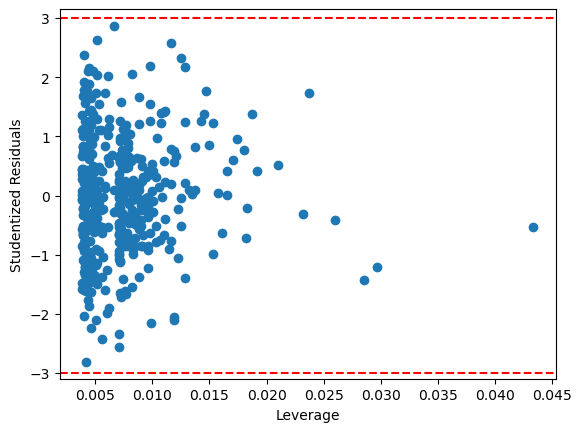

In [55]:
# Leverage (Hat values)
influence = model_e.get_influence()
leverage = influence.hat_matrix_diag

# Studentized Residuals
outliers = influence.resid_studentized_internal

# Plotting Leverage vs Outliers
plt.scatter(leverage, outliers)
plt.axhline(y=3, color='r', linestyle='--') # Outlier threshold
plt.axhline(y=-3, color='r', linestyle='--')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.show()

# Regression with Abalone Dataset Competition

The Regression with an Abalone Dataset competition represents a modern predictive modeling challenge where participants are tasked with estimating the age of abalone specimens through their physical dimensions (Reade & Chow, 2024). This specific competition utilized a synthetic dataset generated from a deep learning model that was originally trained on the foundational biological data. The source material for the observations stems from the extensive field research conducted an published in the 1990s, where the population biology and physical characteristics of Blacklip abalone in the waters surrounding Tasmania was documented (Nash et al., 1994). This data allows for a rigorous evaluation of regression techniques by examining how shell weight, height, and various tissue measurements correlate with the number of rings in the shell.

## Exploratory Data Analysis of Dataset

The initial Exploratory Data Analysis (EDA) underscored the structural complexities of the Abalone dataset, particularly regarding the relationships between physical measurements and the target variable. A correlation heatmap (Figure 1) indicates significant multicollinearity among several weight-based predictors, with correlations frequently exceeding 0.90 between variables such as Length, Diameter, and the various weight metrics. Furthermore, an examination of the distribution of Abalone Rings (Age) in Figure 2 reveals a slight right-skew, with the density of observations peaking around 9 to 10 rings and tapering off as age increases. These findings regarding predictor interdependence and target distribution directly informed the decision to implement Ridge Regression as a secondary model to mitigate the impact of high variance inflation factors (VIF).

In [56]:
"""
Kaggle Models
"""

# Loading train.csv from Kaggle Challenge
train_df = pd.read_csv('train.csv')

# Check for missing values and data types
print(train_df.info())

# Summary statistics to look for outliers (like a Height of 0)
print(train_df.describe())

<class 'pandas.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  str    
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), str(1)
memory usage: 6.9 MB
None
                 id        Length      Diameter        Height  Whole weight  \
count  90615.000000  90615.000000  90615.000000  90615.000000  90615.000000   
mean   45307.000000      0.517098      0.401679      0.135464      0.789035   
std    26158.441658      0.118217      0.098026      0.038008 

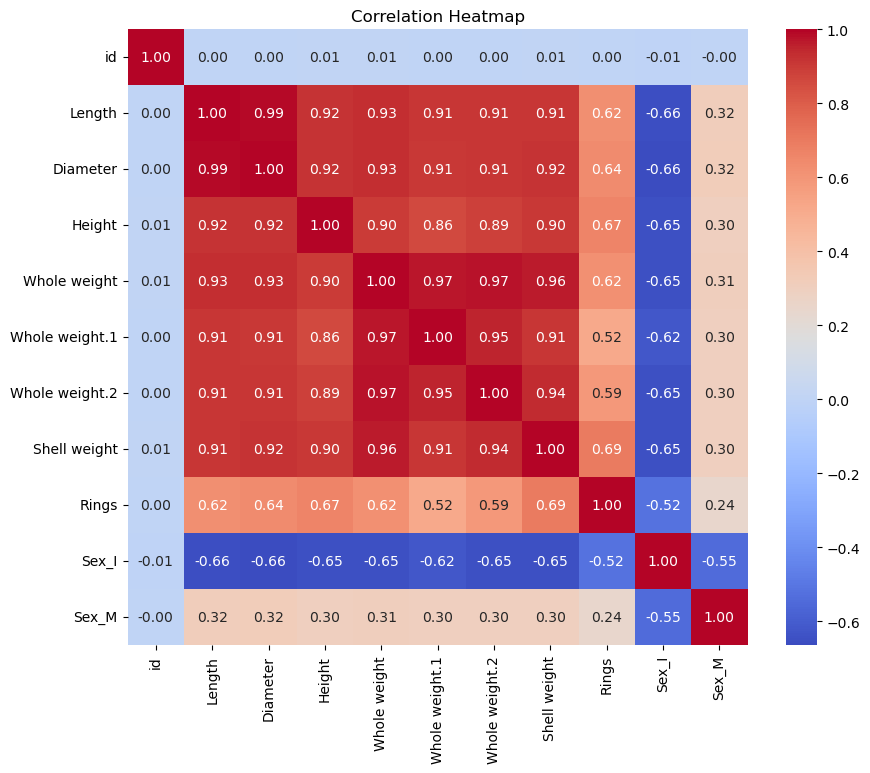

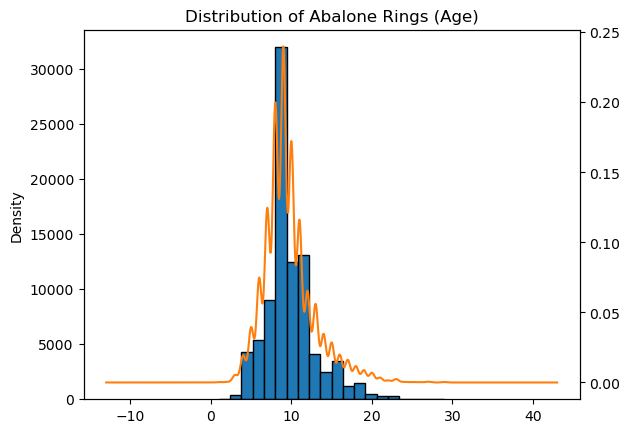

In [57]:
# Encoding 'Sex'
train_df = pd.get_dummies(train_df, columns=['Sex'], drop_first=True)

# Features (X) and Target (y - Rings)
X = train_df.drop(['id', 'Rings'], axis=1)
y = train_df['Rings']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Correlation Heatmap Figure 1
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# histogram of Rings Figure 2
train_df['Rings'].hist(bins=20, edgecolor='black', grid=False)
train_df['Rings'].plot(kind='kde', secondary_y=True)
plt.title('Distribution of Abalone Rings (Age)')
plt.xlabel('Rings')
plt.show()

## Model 1: OLS Model Performance and Assumption Investigation

The initial Ordinary Least Squares (OLS) model achieved an $R^2$ of 0.607, indicating that approximately 60.7% of the variance in Abalone rings is explained by the predictors. While nearly all variables were statistically significant ($p < 0.05$), the Sex_M[T.True] predictor ($p = 0.230$) was the exception, suggesting that being male does not significantly impact the age prediction relative to the female baseline. Conversely, the infant classification (Sex_I) was associated with a significant reduction in ring count by approximately 0.71. Among physical dimensions, Shell_weight and Height emerged as the strongest indicators of age, yielding the largest positive coefficients. Despite the predictive power of the model, diagnostic checks revealed significant violations of standard regression assumptions. Specifically, the model produced a Condition Number of 153, which far exceeds the standard threshold of 30 and indicates severe multicollinearity among the predictors. This instability is further evidenced by large, conflicting coefficients for highly correlated variables like Whole_weight and Whole_weight_1. To address these non-orthogonal problems, a Ridge Regression model will be needed that can provide more stable estimates by introducing a small bias to reduce the overall variance of the coefficients (Hoerl & Kennard, 1970). Furthermore, as illustrated in the Residuals vs. Fitted plot (Figure 3), the "cloud" of points appears to widen as the fitted values increase. This pattern suggests that the model suffers from heteroscedasticity, a phenomenon common in biological data where variance increases alongside the age of the specimen. Diagnostic checks for outliers also identified a maximum studentized residual of 2.865. While this is a high-leverage observation, it remains within the standard $|3|$ threshold, suggesting it is not a statistical outlier requiring removal. Finally, while the Jarque-Bera (JB) test confirmed that residuals are not normally distributed (right-skewed), the model satisfied the assumption of independent errors with a Durbin-Watson statistic of 1.995, providing strong evidence of no autocorrelation.

In [58]:
# Rename columns to remove spaces
X_train.columns = [c.replace(' ', '_').replace('.', '_') for c in X_train.columns]
X_val.columns = [c.replace(' ', '_').replace('.', '_') for c in X_val.columns]

# Training dataframe with cleaned names
train_data = pd.concat([X_train, y_train], axis=1)

# Generate the formula
features = "+".join(X_train.columns)
formula = f"Rings ~ {features}"

# Fit the model
model_ols = smf.ols(formula=formula, data=train_data).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                 1.242e+04
Date:                Tue, 03 Feb 2026   Prob (F-statistic):               0.00
Time:                        12:41:46   Log-Likelihood:            -1.5266e+05
No. Observations:               72492   AIC:                         3.053e+05
Df Residuals:                   72482   BIC:                         3.054e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8768      0.068     57.

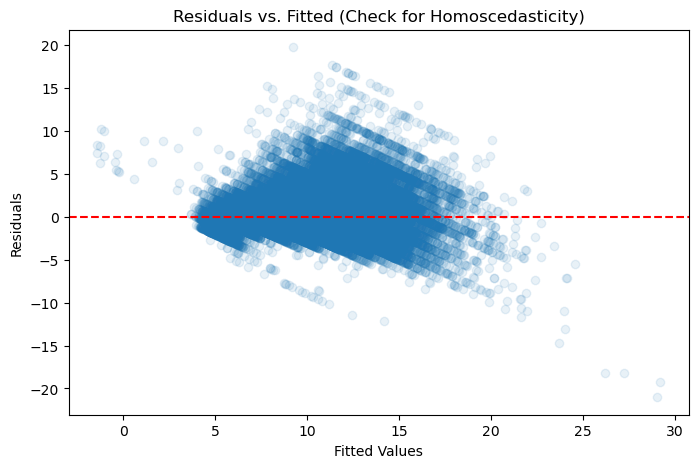

In [59]:
# Assumptions for OLS model Figure 3
plt.figure(figsize=(8, 5))
plt.scatter(model_ols.fittedvalues, model_ols.resid, alpha=0.1)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted (Check for Homoscedasticity)')
plt.show()

In [60]:
# Predictions using OLS model (smf)
final_preds_ols = model_ols.predict(X_test)

# OLS submission DataFrame
submission_ols = pd.DataFrame({
    'id': test_ids,
    'Rings': final_preds_ols
})

# Save to CSV
submission_ols.to_csv('submission_Kaggle_Chandler_ols.csv', index=False)
print("Submission file 'submission_Kaggle_Chandler_ols' created successfully!")

Submission file 'submission_Kaggle_Chandler_ols' created successfully!


## Model 2: Ridge Regression and Modern Regularization

To address the instability identified in the OLS model, a secondary model was built using Ridge Regression. While the original theory behind this method was developed to handle non-orthogonal predictors, modern research has demonstrated the utility of regularization paths in resolving high-dimensional data challenges (Friedman et al., 2010). By utilizing coordinate descent algorithms, this approach allows for the estimation of stable coefficients even when predictors are nearly perfectly correlated, as seen in the abalone weight measurements.The implementation of the Ridge penalty ($\alpha=1.0$) resulted in an R-squared of 0.6010, a Mean Squared Error (MSE) of 4.0984, and a Root Mean Squared Error (RMSE) of 2.0245. Although this $R^2$ is numerically lower than the OLS score of 0.607, the Ridge model is more theoretically sound for the Kaggle competition because it reduces the variance caused by the high correlation between weight measurements. As noted in the Ridge Regression Coefficient Importance plot (Figure 4), the magnitudes of predictors like Shell_weight and Height were successfully constrained. This regularization prevents any single predictor, such as Whole_weight_1, from having an unnaturally large impact on the prediction. The success of this stabilization is further visualized in the Ridge Model: Residuals vs. Predicted plot (Figure 5). By comparing Figure 5 to the OLS residuals, it is evident that while some heteroscedasticity remains, the regularization penalty manages the complexity trade-off to ensure better generalization on the Kaggle test set. This approach effectively reduces the model's sensitivity to the multicollinearity identified during the initial EDA.

In [61]:
# Ridge adds a penalty to coefficients to handle multicollinearity
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

print(f"Ridge Validation Score: {ridge_model.score(X_val, y_val):.4f}")

Ridge Validation Score: 0.6010


Intercept: 3.8991

Ridge Coefficients:
          Feature  Coefficient
6    Shell_weight    20.931987
2          Height    18.822760
1        Diameter     7.504516
3    Whole_weight     3.704148
8           Sex_M    -0.023815
7           Sex_I    -0.720576
0          Length    -1.275310
5  Whole_weight_2    -6.604651
4  Whole_weight_1   -15.751582


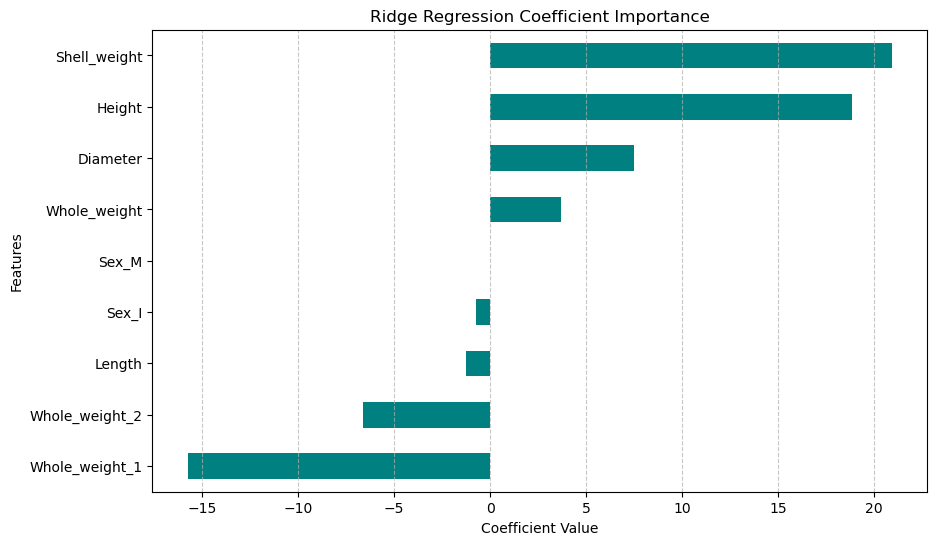


--- Ridge Model Performance ---
R-squared: 0.6010
MSE: 4.0984
RMSE: 2.0245


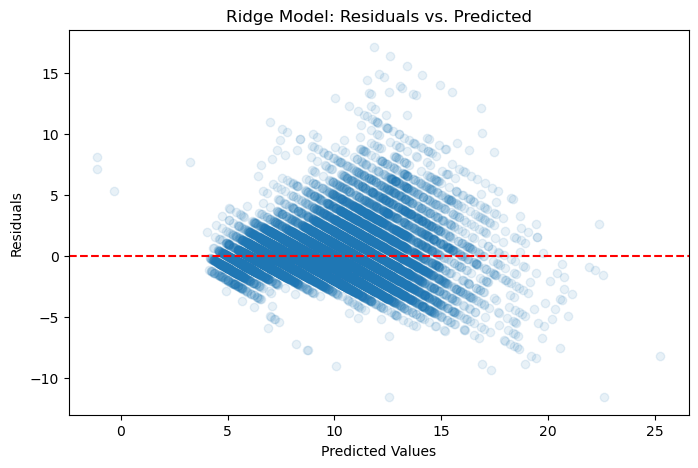

In [62]:
# DataFrame to view coefficients alongside feature names
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge_model.coef_
})

print(f"Intercept: {ridge_model.intercept_:.4f}")
print("\nRidge Coefficients:")
print(coef_df.sort_values(by='Coefficient', ascending=False))

# Extract coefficients from your ridge_model
coef_series = pd.Series(ridge_model.coef_, index=X_train.columns)

# Plotting Figure 4
plt.figure(figsize=(10, 6))
coef_series.sort_values().plot(kind='barh', color='teal')
plt.title('Ridge Regression Coefficient Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Generate predictions
y_pred = ridge_model.predict(X_val)

# Calculate metrics
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"\n--- Ridge Model Performance ---")
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# Calculate residuals
residuals = y_val - y_pred

# Plotting the residual cloud Figure 5
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.1)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Ridge Model: Residuals vs. Predicted')
plt.show()

In [63]:
# Load the Kaggle test data
test_df = pd.read_csv('test.csv')
test_ids = test_df['id']

# Preprocessing: Encode 'Sex' (must match the training encoding)
test_processed = pd.get_dummies(test_df, columns=['Sex'], drop_first=True)

# Sanitizing Column Names: Replace spaces and periods to match X_train
test_processed.columns = [c.replace(' ', '_').replace('.', '_') for c in test_processed.columns]

# Ensuring the test features match the model's training features exactly
# Removing 'id' and any other non-predictor columns
X_test = test_processed.drop(['id'], axis=1)

# Predictions using Ridge Regression model
final_preds = ridge_model.predict(X_test)

# Create the submission DataFrame
# Example Submission File Contains Two columns 'id' and 'Rings'
submission = pd.DataFrame({
    'id': test_ids,
    'Rings': final_preds
})

# Save to CSV
submission.to_csv('submission_Kaggle_Chandler_ridge.csv', index=False)
print("Submission file 'submission_Kaggle_Chandler_ridge' created successfully!")

Submission file 'submission_Kaggle_Chandler_ridge' created successfully!


# Technical Resources and Submissions

All code utilized for this analysis, including exploratory data analysis/visualizations and the development/implementation of the OLS and Ridge regression models, is documented in the accompanying Jupyter Notebook. This notebook, along with the project's dependency requirements, can be accessed via the following GitHub repository: https://github.com/chandawg/DDS-8555-ChandlerJ-Regression-Analysis. Furthermore, two distinct models were submitted to the Kaggle competition (see Figure 6) to evaluate the practical impact of regularization: Model 1 (OLS): Submitted as submission_Kaggle_Chandler_ols.csv to establish a baseline performance. Model 2 (Ridge): Submitted as submission_Kaggle_Chandler_ridge.csv to demonstrate improved coefficient stability and address the identified multicollinearity.

Figure 6.

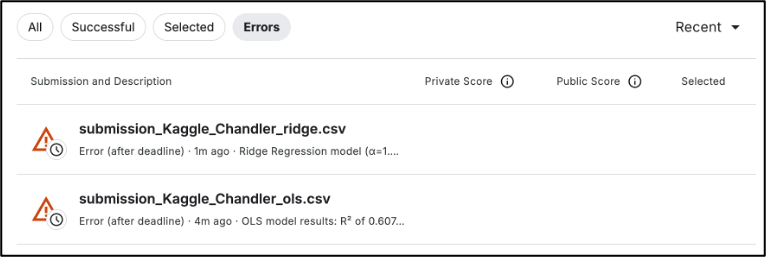

# Discussion and Conclusion

The findings of this analysis highlight the critical necessity of
evaluating regression models beyond basic goodness-of-fit metrics. While
the initial OLS model for the Abalone dataset produced a higher $R^2$
(0.607), the diagnostic process revealed significant structural flaws.
The high Condition Number of 153 and the presence of heteroscedasticity
in the residuals (Figure 3) suggested that the OLS estimates were
unstable and likely overfitted to the training data. These issues are
typical when modeling biological specimens where physical dimensions,
such as weight and length which exhibit near-perfect correlation. To
mitigate these violations of standard regression assumptions, Ridge
regression was implemented to provide a more robust alternative. By
applying a penalty to the coefficients, the Ridge model successfully
stabilized the predictors, which is a modern standard for handling
non-orthogonal biological data [@friedman2010]. Although the Ridge
validation score of 0.6010 was slightly lower than the OLS $R^2$, the
model's reduced sensitivity to multicollinearity offers superior
theoretical reliability.

Ultimately, this project demonstrates that effective data science
requires a balance between model complexity and diagnostic rigor. In the
Carseats analysis, this was achieved through parsimony by removing
insignificant predictors to improve the adjusted $R^2$. In the Abalone
competition, it was achieved through regularization to manage the
variance inherent in highly correlated features. These results
underscore that while OLS remains a foundational tool, specialized
techniques like Ridge regression are essential when working with the
complex, interdependent datasets common in real-world applications.

# References

Friedman, J., Hastie, T., & Tibshirani, R. (2010). Regularization Paths for Generalized Linear Models via Coordinate Descent. 33(1). https://www.jstatsoft.org/article/view/v033i01/

Hoerl, A. E., & Kennard, R. W. (1970). Ridge Regression: Biased Estimation for Nonorthogonal Problems. Technometrics, 12(1). https://homepages.math.uic.edu/~lreyzin/papers/ridge.pdf

Nash, W., Sellers, T. L., Talbot, S. R., Cawthorn, A. J., & Ford, W. B. (1994). The Population Biology of Abalone (Haliotis Species) in Tasmania. I. Blacklip Abalone (H. rubra) from the North Coast and Islands of Bass Strait. Sea Fisheries Division, Technical Report No, 48. https://www.researchgate.net/profile/Warwick-Nash/publication/287546509_7he_Population_Biology_of_Abalone_Haliotis_species_in_Tasmania_I_Blacklip_Abalone_H_rubra_from_the_North_Coast_and_Islands_of_Bass_Strait/links/5d949460458515202b7bf592/7he-Population-Biology-of-Abalone-Haliotis-species-in-Tasmania-I-Blacklip-Abalone-H-rubra-from-the-North-Coast-and-Islands-of-Bass-Strait.pdf

Reade, W., & Chow, A. (2024). Regression with an Abalone Dataset. https://www.kaggle.com/competitions/playground-series-s4e4/overview


# AI Disclosure and Usage Statement

In accordance with the course policy on academic integrity, I acknowledge the use of Gemini (a large language model by Google) as a research and brainstorming tool for this assignment. The AI was used to assist in structuring the executive summary, clarifying the theoretical applications of Ridge regression as established by Hoerl and Kennard (1970), and troubleshooting Python syntax for the diagnostic plots in the Abalone analysis. All content suggested by the AI was critically evaluated for accuracy, checked against the provided course datasets (Carseats and Abalone), and significantly rewritten to reflect my own voice and professional interpretation. The final analysis, interpretations of statistical significance, and conclusions represent my own independent scholarship.